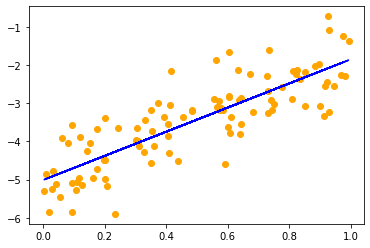

In [1]:
import random
import matplotlib.pyplot as plt

def fuzz(k):
    return k*random.gauss(0, 1)

def make_data(a, b, n=100, k=0.7):
    x = [random.random() for _ in range(n)]
    y = [xi*b + a + fuzz(k) for xi in x]
    return x, y

def mean(x):
    return sum(x) / len(x)

def ss(x):
    xm = mean(x)
    return sum([(xi - xm)**2 for xi in x])

def standard_deviation(x):
    ssx = ss(x)
    return (ssx / len(x))**0.5

def correlation(x, y):
    xm, ym = mean(x), mean(y)
    ssx, ssy = ss(x), ss(y)
    sscross = sum([(xi - xm)*(yi - ym) for xi, yi in zip(x, y)])
    return sscross / (ssx * ssy)**0.5

def linreg(x, y):
    beta = correlation(x, y) * standard_deviation(y) / standard_deviation(x)
    alpha = mean(y) - beta * mean(x)
    return alpha, beta

a, b = -5, 3
x, y = make_data(a, b)
plt.scatter(x, y, color='orange')
alpha, beta = linreg(x, y)
plt.plot(x, [xi*beta + alpha for xi in x], color='blue');